<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [1]:
# !wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [2]:
# !pip install pandas 
# !pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [12]:
# Read the CSV file
df = pd.read_csv('../module3/survey_data_final_m3.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,WorkedWith_Python,WorkedWith_JavaScript,WorkedWith_R,WorkedWith_TypeScript,WorkedWith_Lua,WorkedWith_HTML/CSS,WorkedWith_Kotlin,WorkedWith_C++,WorkedWith_PowerShell,Age_numeric
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary school,Books / Physical media,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,Bachelor's degree,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,39.5
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,Master's degree,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,49.5
3,4,I am learning to code,18-24 years old,"Student, full-time",No,Apples,NaN,Some college,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,21.0
4,5,I am a developer by profession,18-24 years old,"Student, full-time",No,Apples,NaN,Secondary school,"Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,21.0


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [4]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [5]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time         No  Apples   
4   Student, full-time         No  Apples   

                                    CodingActivities            EdLevel  \
0                                              Hobby     Primary school   
1  Hobby;Contribute to open-source projects;Other...  Bachelor's degree   
2  Hobby;Contribute to open-source projects;Other...    Master's degree   
3             

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [13]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df_sql = pd.read_sql_query(QUERY, conn)
df_sql.head()


,COUNT(*)
0,63184


## Demo: Listing All Tables


To view the names of all tables in the database:


In [7]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,13916
1,25-34 years old,23237
2,35-44 years old,14241
3,45-54 years old,5914
4,55-64 years old,2447
5,65 years or older,759
6,Prefer not to say,219
7,Under 18 years old,2451


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [17]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df_sql = pd.read_sql_query(QUERY, conn)
print(df_sql.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" REAL,
  "YearsCodePro" REAL,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,
  "MiscTechAdmired" TEXT,
  "ToolsTechHaveWorkedWith" TEXT,

## Hands-on Lab


In [19]:
for col in df.columns:
    print(col)  

ResponseId
MainBranch
Age
Employment
RemoteWork
Check
CodingActivities
EdLevel
LearnCode
LearnCodeOnline
TechDoc
YearsCode
YearsCodePro
DevType
OrgSize
PurchaseInfluence
BuyNewTool
BuildvsBuy
TechEndorse
Country
Currency
CompTotal
LanguageHaveWorkedWith
LanguageWantToWorkWith
LanguageAdmired
DatabaseHaveWorkedWith
DatabaseWantToWorkWith
DatabaseAdmired
PlatformHaveWorkedWith
PlatformWantToWorkWith
PlatformAdmired
WebframeHaveWorkedWith
WebframeWantToWorkWith
WebframeAdmired
EmbeddedHaveWorkedWith
MiscTechHaveWorkedWith
MiscTechWantToWorkWith
MiscTechAdmired
ToolsTechHaveWorkedWith
ToolsTechWantToWorkWith
ToolsTechAdmired
NEWCollabToolsHaveWorkedWith
NEWCollabToolsWantToWorkWith
NEWCollabToolsAdmired
OpSysPersonal use
OpSysProfessional use
OfficeStackAsyncHaveWorkedWith
OfficeStackAsyncWantToWorkWith
OfficeStackAsyncAdmired
OfficeStackSyncHaveWorkedWith
OfficeStackSyncWantToWorkWith
OfficeStackSyncAdmired
AISearchDevHaveWorkedWith
AISearchDevWantToWorkWith
AISearchDevAdmired
NEWSOSites


<Axes: >

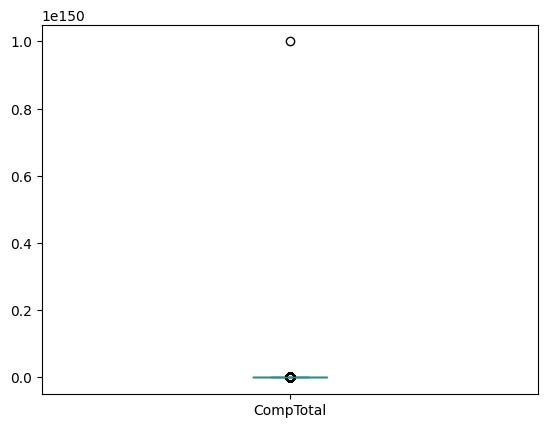

In [34]:
df_comp_total['CompTotal'].plot(kind='box')

In [ ]:
df_comp_total = df[df['CompTotal'] != 110000.0]

In [122]:
max_comp = df_comp_total['CompTotal'].max()
print(f"The maximum compensation is: {max_comp}")

The maximum compensation is: 4920000.0


In [123]:
print(df_comp_total.drop(df_comp_total[df_comp_total['CompTotal'] == max_comp].index, inplace=True))

None


C:\Users\akar\AppData\Local\Temp\ipykernel_29988\499557227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  print(df_comp_total.drop(df_comp_total[df_comp_total['CompTotal'] == max_comp].index, inplace=True))


In [124]:
# lets remove the outlier
q1 = df_comp_total['CompTotal'].quantile(0.25)
q3 = df_comp_total['CompTotal'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df_comp_total[(df_comp_total['CompTotal'] < lower_bound) | (df_comp_total['CompTotal'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")


Number of outliers: 4939


In [127]:
df_comp_total.drop(outliers.index, inplace=True)

C:\Users\akar\AppData\Local\Temp\ipykernel_29988\4120087821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp_total.drop(outliers.index, inplace=True)


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


<Axes: xlabel='CompTotal', ylabel='Count'>

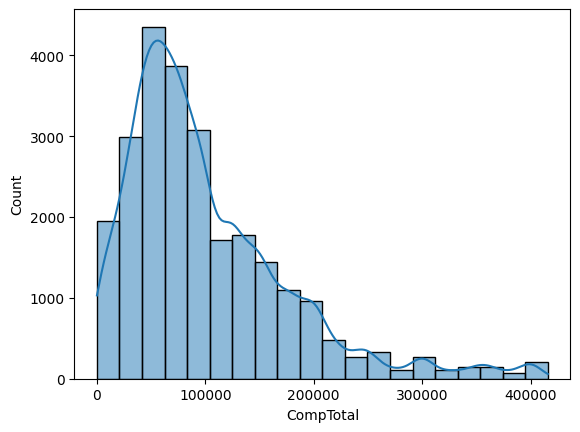

In [130]:
sns.histplot(df_comp_total['CompTotal'], bins=20, kde=True)

**Box Plots**

Plot a box plot of Age.


<Axes: >

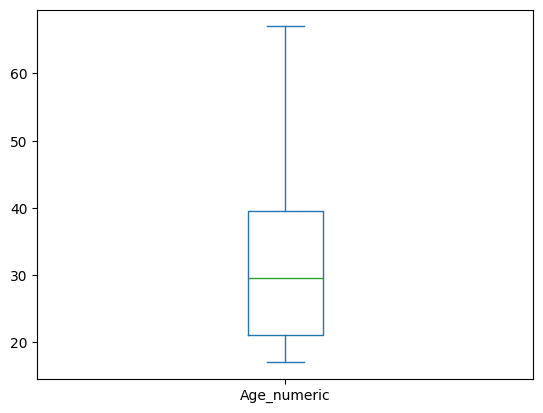

In [136]:
## Write your code here
df['Age_numeric'].plot(kind='box')


### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


<Axes: xlabel='Age_numeric', ylabel='WorkExp'>

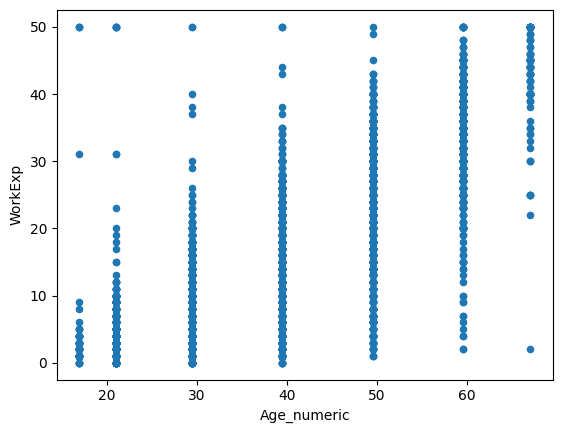

In [142]:
## Write your code here
df.plot(kind='scatter', x='Age_numeric', y='WorkExp')

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


<Axes: xlabel='TimeSearching', ylabel='Frustration'>

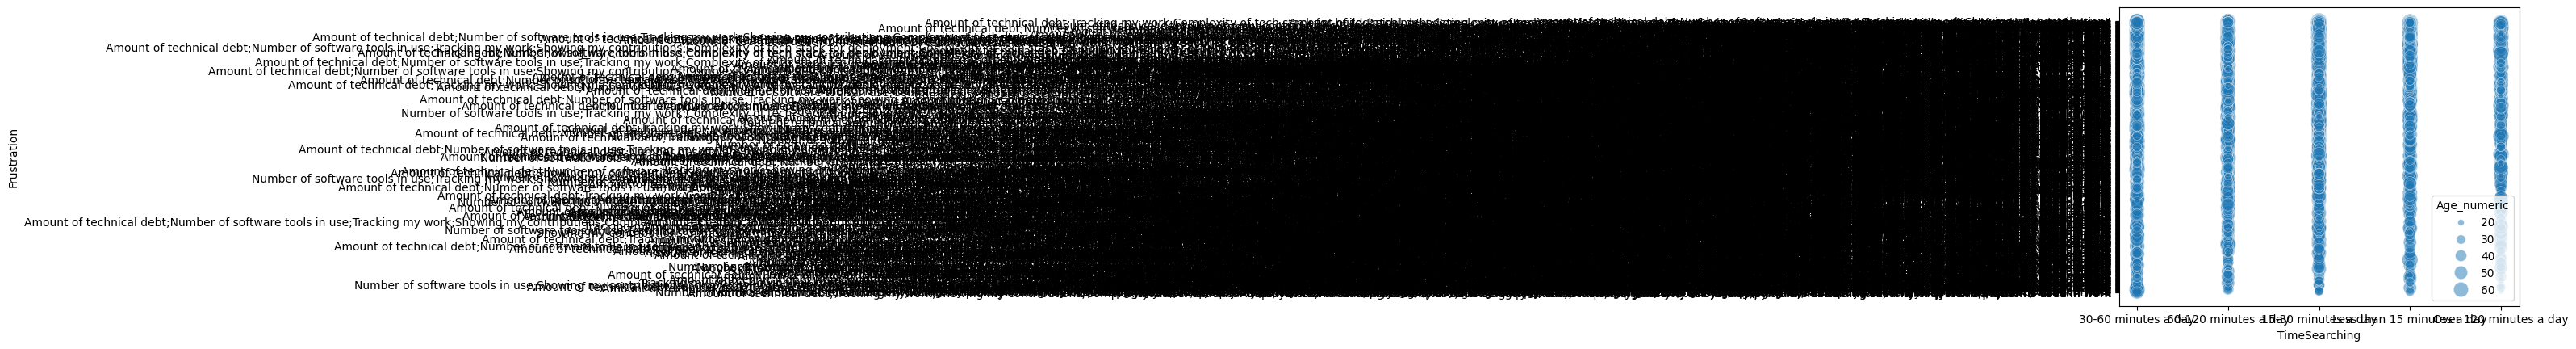

In [146]:
## Write your code here
sns.scatterplot(data=df, x='TimeSearching', y='Frustration', size='Age_numeric', sizes=(20, 200), alpha=0.5)

In [150]:
for i in df['Frustration'].value_counts().index:
    print(i)

None of these
Amount of technical debt
Amount of technical debt;Reliability of tools/systems used in work
Amount of technical debt;Complexity of tech stack for deployment;Complexity of tech stack for build
Amount of technical debt;Tracking my work
Amount of technical debt;Patching/updating core components
Amount of technical debt;Complexity of tech stack for build
Amount of technical debt;Complexity of tech stack for deployment
Tracking my work
Complexity of tech stack for deployment;Complexity of tech stack for build
Tracking my work;Showing my contributions
Amount of technical debt;Tracking my work;Showing my contributions
Amount of technical debt;Number of software tools in use
Amount of technical debt;Complexity of tech stack for deployment;Complexity of tech stack for build;Reliability of tools/systems used in work
Reliability of tools/systems used in work
Complexity of tech stack for build
Amount of technical debt;Number of software tools in use;Complexity of tech stack for deplo

In [164]:
unique_values_in_frustration = df['Frustration'].unique()
unique_items = set(x for i in unique_values_in_frustration for x in str(i).split(';'))
unique_items

{'Amount of technical debt',
 'Complexity of tech stack for build',
 'Complexity of tech stack for deployment',
 'Maintaining security of code being produced',
 'Maintaining security of systems/platforms used in work',
 'None of these',
 'Number of software tools in use',
 'Patching/updating core components',
 'Reliability of tools/systems used in work',
 'Showing my contributions',
 'Tracking my work',
 'nan'}

In [166]:
unique_items.discard('nan')

In [170]:
df['Frustration'].describe()

count             27153
unique              950
top       None of these
freq               2271
Name: Frustration, dtype: object

In [173]:
df_chart_frust_timeSearching = df[['Frustration', 'TimeSearching','Age_numeric']].copy()

for item in unique_items:
    df_chart_frust_timeSearching[f'Frust_{item}'] = df_chart_frust_timeSearching['Frustration'].apply(lambda x: 1 if item in str(x).split(';') else 0)
df_chart_frust_timeSearching.tail()

,Frustration,TimeSearching,Age_numeric,Frust_Number of software tools in use,Frust_Reliability of tools/systems used in work,Frust_Patching/updating core components,Frust_Maintaining security of systems/platforms used in work,Frust_Complexity of tech stack for deployment,Frust_Tracking my work,Frust_Amount of technical debt,Frust_None of these,Frust_Showing my contributions,Frust_Maintaining security of code being produced,Frust_Complexity of tech stack for build
63179,NaN,NaN,21.0,0,0,0,0,0,0,0,0,0,0,0
63180,NaN,NaN,29.5,0,0,0,0,0,0,0,0,0,0,0
63181,NaN,NaN,29.5,0,0,0,0,0,0,0,0,0,0,0
63182,NaN,NaN,21.0,0,0,0,0,0,0,0,0,0,0,0
63183,NaN,NaN,21.0,0,0,0,0,0,0,0,0,0,0,0


In [174]:
df_chart_frust_timeSearching.dropna(inplace=True)

In [175]:
df_chart_frust_timeSearching.head()

,Frustration,TimeSearching,Age_numeric,Frust_Number of software tools in use,Frust_Reliability of tools/systems used in work,Frust_Patching/updating core components,Frust_Maintaining security of systems/platforms used in work,Frust_Complexity of tech stack for deployment,Frust_Tracking my work,Frust_Amount of technical debt,Frust_None of these,Frust_Showing my contributions,Frust_Maintaining security of code being produced,Frust_Complexity of tech stack for build
10,Amount of technical debt;Number of software to...,30-60 minutes a day,39.5,1,0,0,0,0,1,1,0,1,0,0
12,Amount of technical debt;Complexity of tech st...,30-60 minutes a day,39.5,0,0,0,0,1,0,1,0,0,0,0
15,Amount of technical debt;Complexity of tech st...,60-120 minutes a day,49.5,0,0,0,0,1,0,1,0,0,1,1
18,Amount of technical debt;Tracking my work;Comp...,15-30 minutes a day,29.5,0,1,1,1,0,1,1,0,0,0,1
20,Number of software tools in use;Tracking my wo...,Less than 15 minutes a day,29.5,1,0,0,0,0,1,0,0,1,0,1


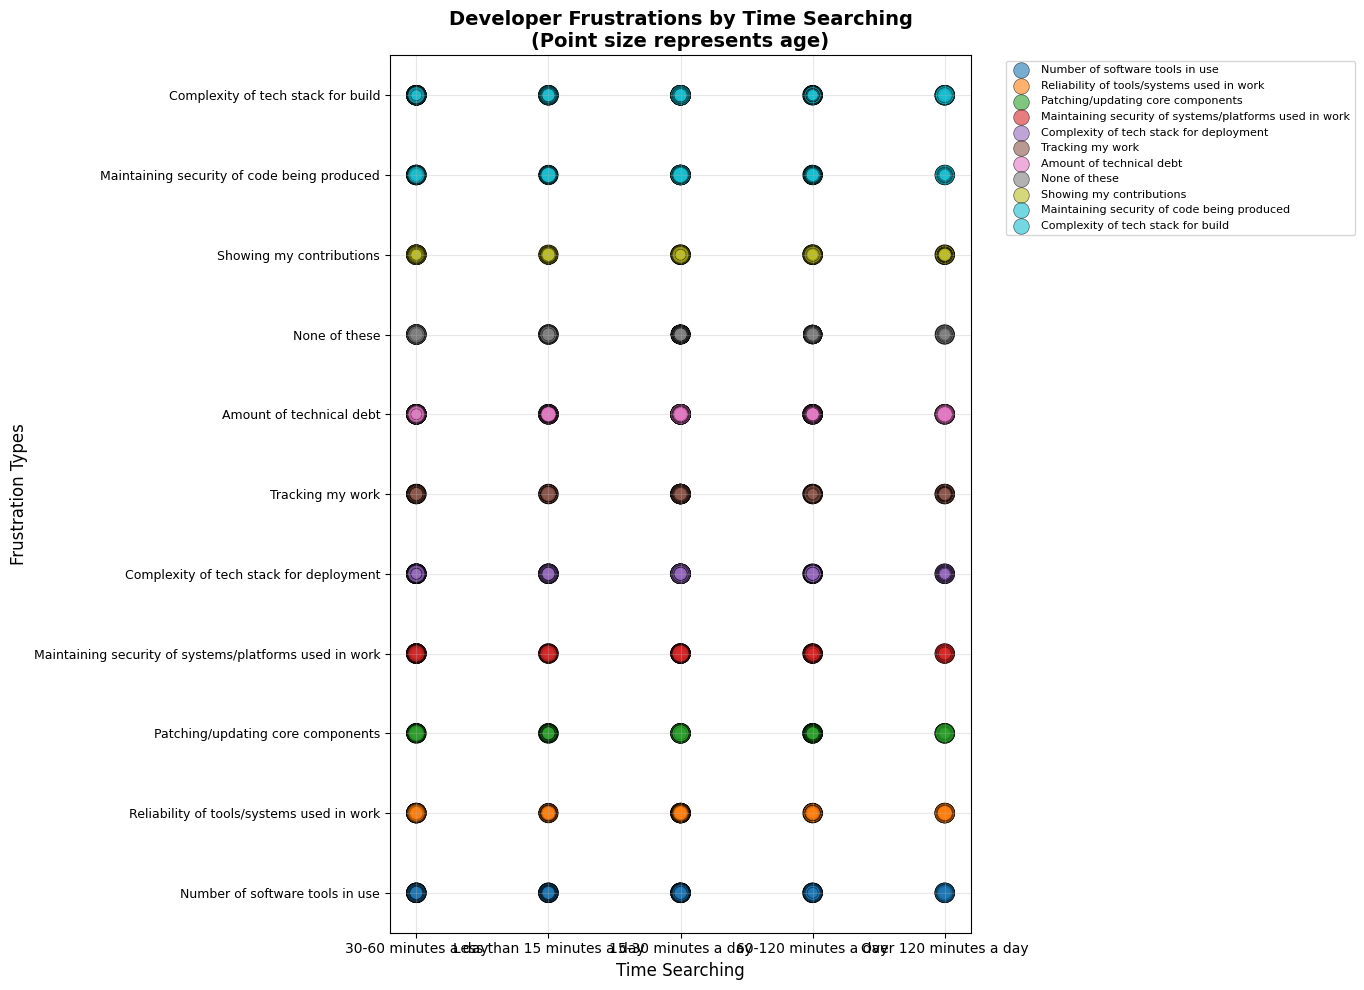


ALTERNATIVE: Individual scatter plots for each frustration type


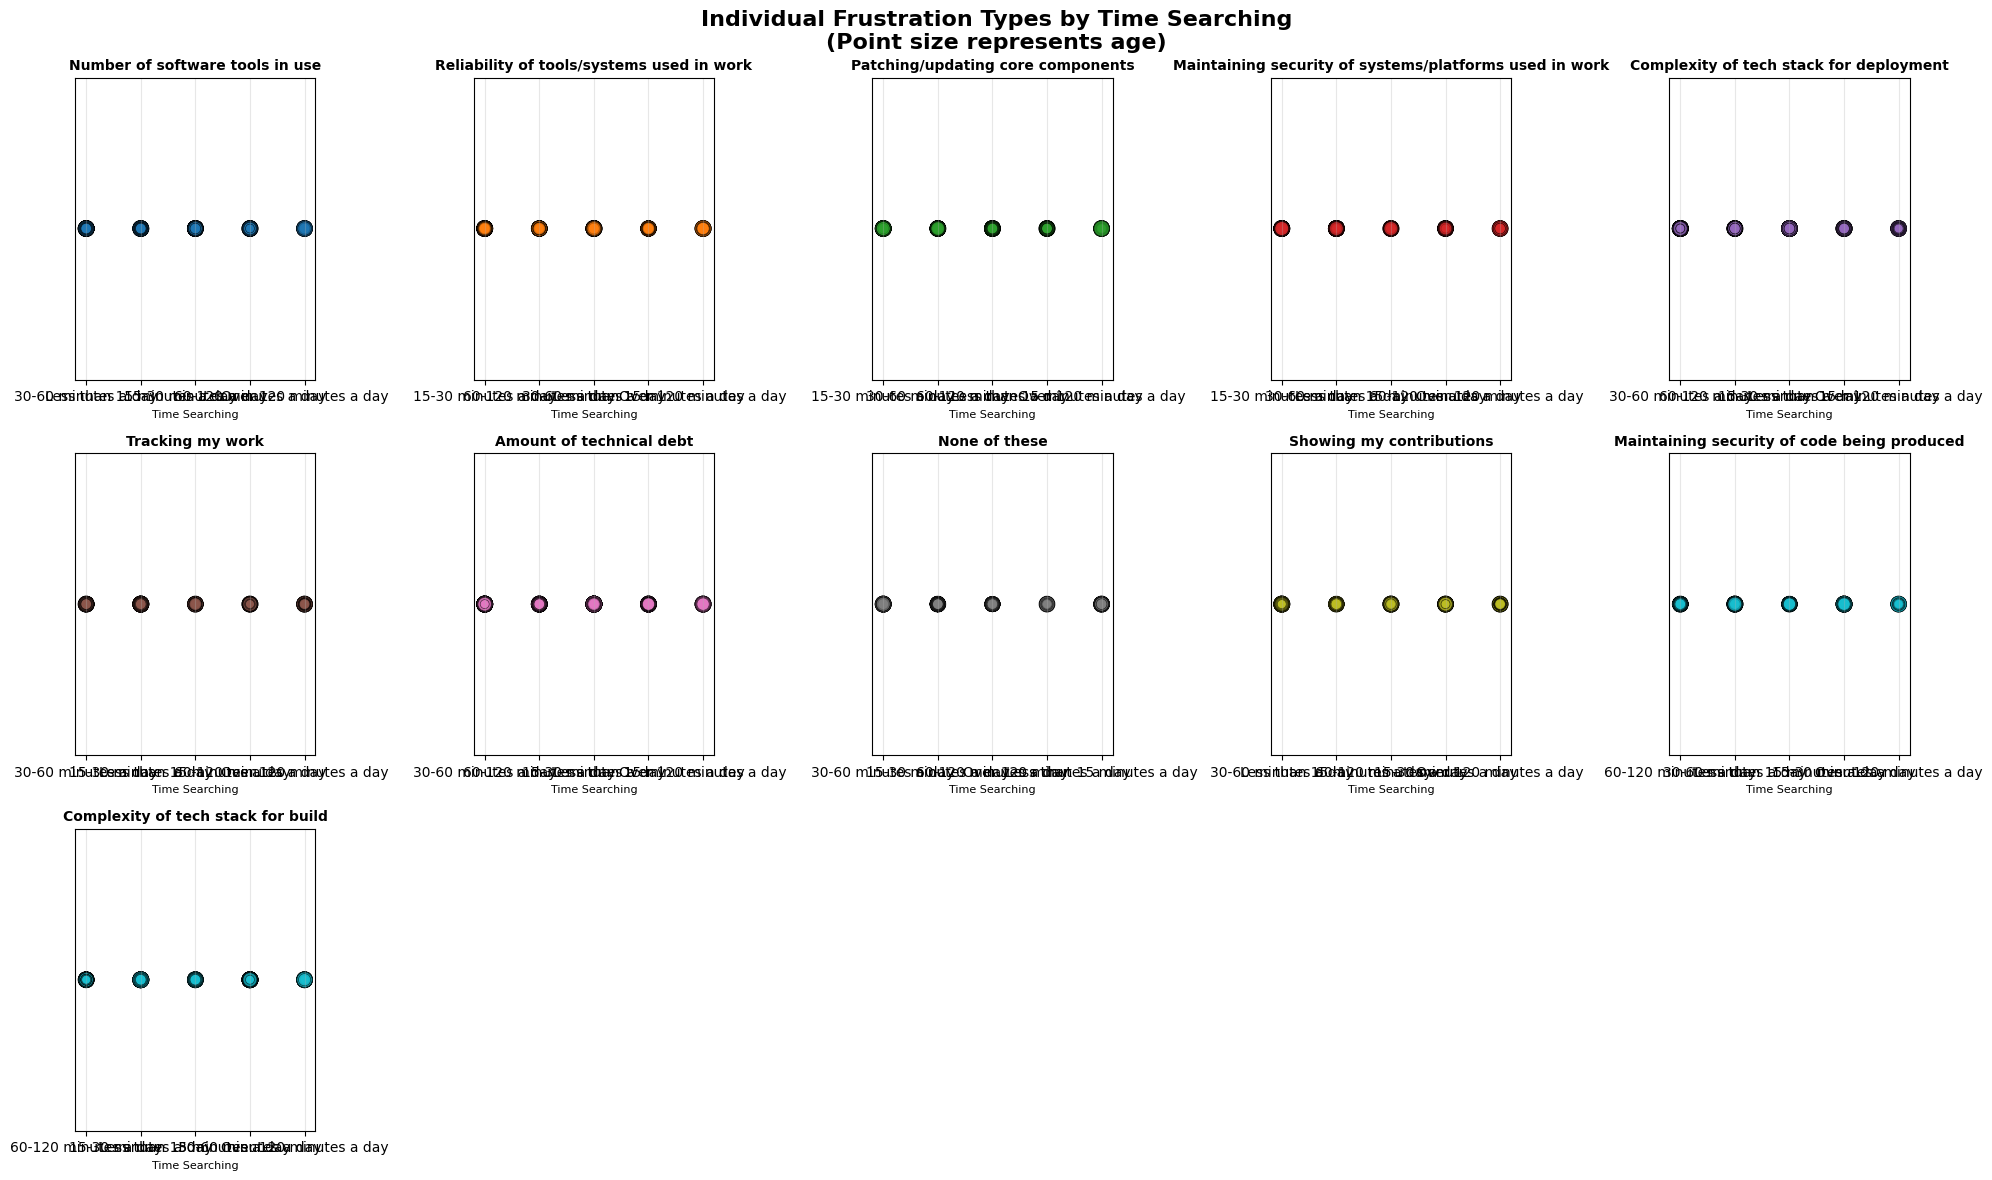


SUMMARY STATISTICS
Number of software tools in use: 6091 respondents (22.6%)
Reliability of tools/systems used in work: 8511 respondents (31.6%)
Patching/updating core components: 6795 respondents (25.2%)
Maintaining security of systems/platforms used in work: 4143 respondents (15.4%)
Complexity of tech stack for deployment: 8648 respondents (32.1%)
Tracking my work: 7360 respondents (27.3%)
Amount of technical debt: 16774 respondents (62.2%)
None of these: 2333 respondents (8.7%)
Showing my contributions: 5256 respondents (19.5%)
Maintaining security of code being produced: 5020 respondents (18.6%)
Complexity of tech stack for build: 8771 respondents (32.5%)


In [ ]:
# Create scatter plot for frustration types (only where value = 1)
plt.figure(figsize=(14, 10))

# Get all frustration columns (starting with 'Frust_')
frustration_columns = [col for col in df_chart_frust_timeSearching.columns if col.startswith('Frust_')]

# Create a color palette for different frustration types
colors = plt.cm.tab10(range(len(frustration_columns)))

# Plot each frustration type separately
for i, frust_col in enumerate(frustration_columns):
    # Filter data where this frustration type = 1
    data_subset = df_chart_frust_timeSearching[df_chart_frust_timeSearching[frust_col] == 1]
    
    if len(data_subset) > 0:  # Only plot if there are data points
        # Create y-values (position each frustration type at different y-level)
        y_values = [i] * len(data_subset)
        
        plt.scatter(
            data_subset['TimeSearching'],
            y_values,
            s=data_subset['Age_numeric'] * 3,  # Size based on age
            alpha=0.6,
            color=colors[i],
            label=frust_col.replace('Frust_', ''),  # Clean label name
            edgecolors='black',
            linewidth=0.5
        )

# Customize the plot
plt.xlabel('Time Searching', fontsize=12)
plt.ylabel('Frustration Types', fontsize=12)
plt.title('Developer Frustrations by Time Searching\n(Point size represents age)', fontsize=14, fontweight='bold')

# Set y-axis labels to show frustration types
plt.yticks(range(len(frustration_columns)), 
           [col.replace('Frust_', '') for col in frustration_columns], 
           fontsize=10)

# Rotate y-axis labels for better readability
plt.gca().tick_params(axis='y', labelsize=9)

# Add legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

# Add grid for better readability
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Alternative visualization: Multiple scatter plots in subplots
print("\n" + "="*50)
print("ALTERNATIVE: Individual scatter plots for each frustration type")
print("="*50)

# Create subplots for better visualization of each frustration type
fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.flatten()

for i, frust_col in enumerate(frustration_columns):
    if i < len(axes):
        # Filter data where this frustration type = 1
        data_subset = df_chart_frust_timeSearching[df_chart_frust_timeSearching[frust_col] == 1]
        
        if len(data_subset) > 0:
            axes[i].scatter(
                data_subset['TimeSearching'],
                [1] * len(data_subset),  # All points at y=1
                s=data_subset['Age_numeric'] * 2,
                alpha=0.7,
                color=colors[i],
                edgecolors='black',
                linewidth=0.5
            )
        
        axes[i].set_title(frust_col.replace('Frust_', ''), fontsize=10, fontweight='bold')
        axes[i].set_xlabel('Time Searching', fontsize=8)
        axes[i].set_yticks([])  # Remove y-axis ticks
        axes[i].grid(True, alpha=0.3)

# Hide unused subplots
for j in range(len(frustration_columns), len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Individual Frustration Types by Time Searching\n(Point size represents age)', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Summary statistics
print("\n" + "="*50)
print("SUMMARY STATISTICS")
print("="*50)
for frust_col in frustration_columns:
    count = df_chart_frust_timeSearching[frust_col].sum()
    percentage = (count / len(df_chart_frust_timeSearching)) * 100
    print(f"{frust_col.replace('Frust_', '')}: {count} respondents ({percentage:.1f}%)")

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


In [185]:
## Write your code here 
df['DatabaseWantToWorkWith'].value_counts()
unique_values_in_db = df['DatabaseWantToWorkWith'].unique()
unique_items = set(x for i in unique_values_in_db for x in str(i).split(';'))
unique_items


{'BigQuery',
 'Cassandra',
 'Clickhouse',
 'Cloud Firestore',
 'Cockroachdb',
 'Cosmos DB',
 'Couch DB',
 'Couchbase',
 'Databricks SQL',
 'Datomic',
 'DuckDB',
 'Dynamodb',
 'Elasticsearch',
 'EventStoreDB',
 'Firebase Realtime Database',
 'Firebird',
 'H2',
 'IBM DB2',
 'InfluxDB',
 'MariaDB',
 'Microsoft Access',
 'Microsoft SQL Server',
 'MongoDB',
 'MySQL',
 'Neo4J',
 'Oracle',
 'PostgreSQL',
 'Presto',
 'RavenDB',
 'Redis',
 'SQLite',
 'Snowflake',
 'Solr',
 'Supabase',
 'TiDB',
 'nan'}

In [186]:
unique_items.discard('nan')

In [187]:
df_db = pd.DataFrame(
    {
        'Database': list(unique_items),
        'Count': [df['DatabaseWantToWorkWith'].str.contains(item, na=False).sum() for item in unique_items]
    }
)
df_db.head()

,Database,Count
0,Firebase Realtime Database,2473
1,Elasticsearch,6024
2,TiDB,236
3,Couch DB,595
4,InfluxDB,1041


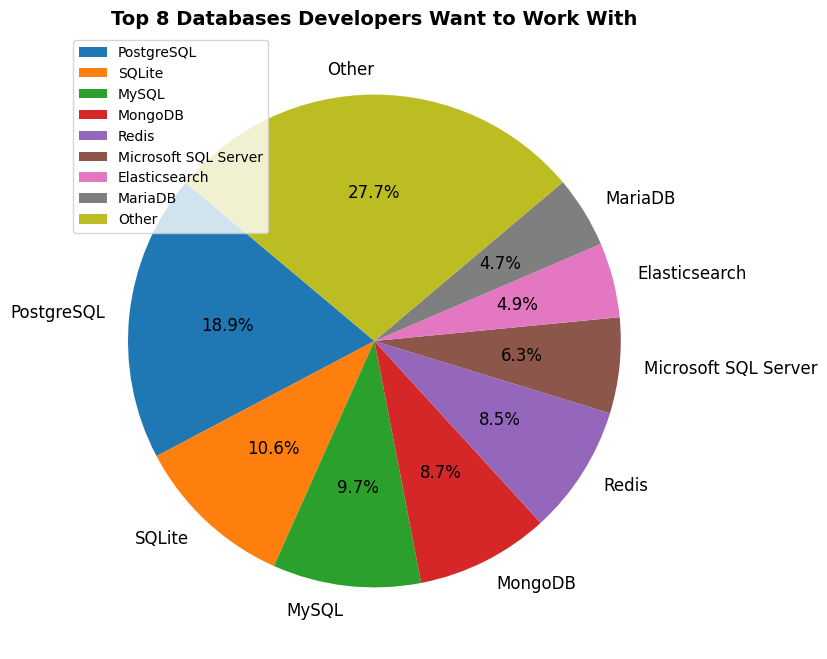

In [195]:
df_db.sort_values(by='Count', ascending=False, inplace=True)
top = 8
df_db_pie_chart = df_db.head(top)
df_db_pie_chart = pd.concat([df_db_pie_chart, pd.DataFrame({'Database': ['Other'], 'Count': [df_db['Count'][top:].sum()]})], ignore_index=True)
df_db_pie_chart.plot.pie(y='Count', labels=df_db_pie_chart['Database'], autopct='%1.1f%%', startangle=140, figsize=(8, 8), textprops={'fontsize': 12})
plt.title(f'Top {top} Databases Developers Want to Work With', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.show()


**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.

In [203]:
df['TimeAnswering'].value_counts()

TimeAnswering
15-30 minutes a day           9040
30-60 minutes a day           8250
Less than 15 minutes a day    5778
60-120 minutes a day          3500
Over 120 minutes a day        1160
Name: count, dtype: int64

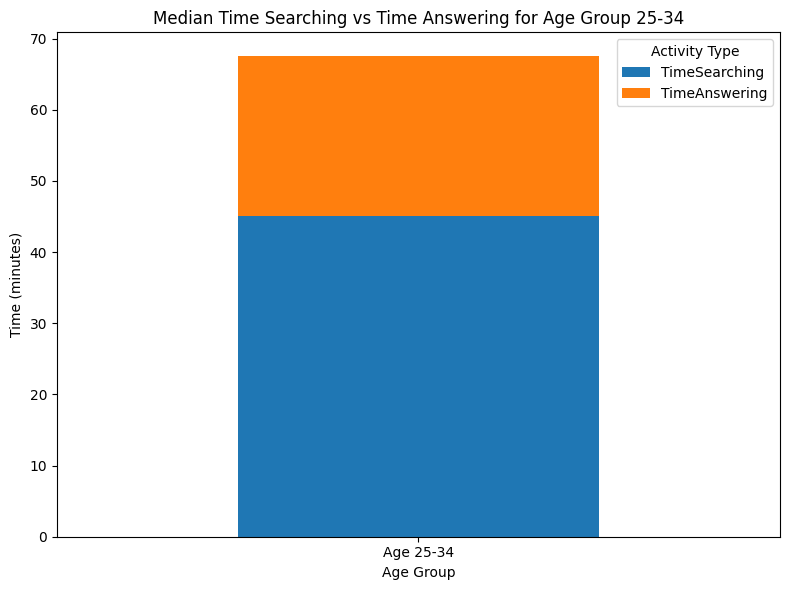

In [209]:
## Write your code here
df_age_25_35 = df[df['Age'] == '25-34 years old']
df_age_25_35 = df[['TimeSearching', 'TimeAnswering']].copy()
# Create TimeSearchingNumeric mapping
time_mapping = {
    'Less than 15 minutes a day': 7.5,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'Over 120 minutes a day': 150
}

df_age_25_35['TimeSearchingNumeric'] = df_age_25_35['TimeSearching'].map(time_mapping)
df_age_25_35['TimeAnsweringNumeric'] = df_age_25_35['TimeAnswering'].map(time_mapping)

# Calculate median values for the stacked chart
median_searching = df_age_25_35['TimeSearchingNumeric'].median()
median_answering = df_age_25_35['TimeAnsweringNumeric'].median()

# Create stacked bar chart
data_for_chart = pd.DataFrame({
    'TimeSearching': [median_searching],
    'TimeAnswering': [median_answering]
}, index=['Age 25-34'])

data_for_chart.plot(kind='bar', stacked=True, figsize=(8, 6))
# df_age_25_35[['TimeSearchingNumeric', 'TimeAnsweringNumeric']].plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Median Time Searching vs Time Answering for Age Group 25-34')
plt.xlabel('Age Group')
plt.ylabel('Time (minutes)')
plt.xticks(rotation=0)
plt.legend(title='Activity Type')
plt.tight_layout()
plt.show()

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


In [ ]:
## Write your code here

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


<Axes: ylabel='MainBranch'>

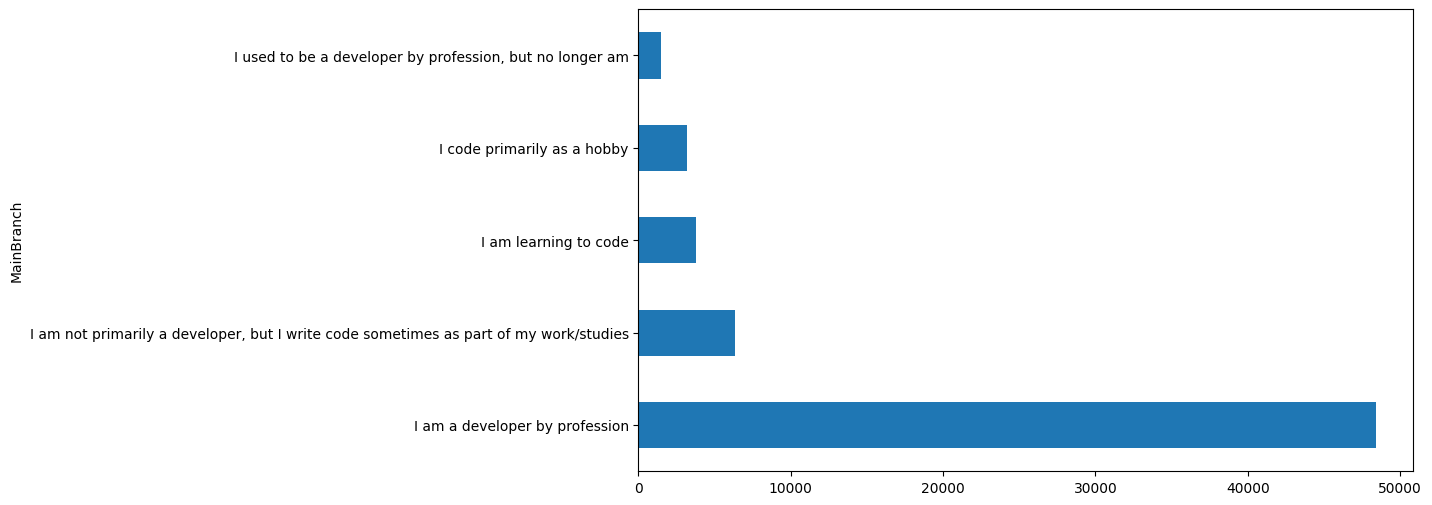

In [212]:
## Write your code here
df['MainBranch'].value_counts().plot(kind='barh', figsize=(10, 6))

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [213]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
